# ShowTime OTT Viewership Analysis
### Linear Regression Project to Identify Key Drivers of First-Day Content Views


## Problem Statement

ShowTime, an OTT content provider, wants to identify the key variables that drive first-day content viewership. This information will be used to improve content performance, marketing effectiveness, and platform strategy. Your objective is to build a linear regression model to predict and explain the first-day views using available content metadata and marketing variables.



## Data Overview

The dataset contains 1000 records of content metadata with the following fields:

- `visitors`: Weekly platform visitors (in millions)
- `ad_impressions`: Number of ad impressions (in millions)
- `major_sports_event`: 0/1 indicating major sports clash on the release day
- `genre`: Genre of the content (categorical)
- `dayofweek`: Release day of the week (categorical)
- `season`: Season of release (categorical)
- `views_trailer`: Trailer views (in millions)
- `views_content`: Target variable - First-day content views (in millions)



## Initial Setup and importing important Python Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load data

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

oData = pd.read_csv('/content/drive/MyDrive/Predictive Modelling/Projects/ottdata.csv')

## Data Description

In [ ]:
oData.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
oData.shape

(1000, 8)

The data contains 1000 rows and 8 columns.

In [ ]:
oData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


From the 8 columns 8 of them are numeric and other 3 are the categorical columns. For Linear Regression model we only need numeric columns.

In [ ]:
oData.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [ ]:
oData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89



* Average first-day views are around 0.47 million, with a wide range (from 0.22M to 0.89M), indicating that some content performs much better than others.

* Platform visitors (last week) range from 1.25M to 2.34M — higher traffic may lead to higher first-day views.

* Ad impressions (marketing spend) vary significantly — more impressions might drive more awareness and better first-day performance.

* Major sports events occurred on 40% of release days — these could divert audience attention and reduce viewership.

* Trailer views show large variation (30M to 200M) — likely a strong predictor of content interest and first-day success.

* Genre distribution is skewed (e.g., “Others” is the most common), but still includes enough variety to compare viewership across genres.

* Friday is the most common release day, followed by weekends — release timing might influence viewership due to user availability.

* Winter and Summer releases are slightly more frequent — possibly linked to holidays or leisure periods that affect viewer engagement.



## Data Preprocessing

In [ ]:
oData.isna().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


No missing values were found in the dataset.
No imputation or deletion required for data cleaning.

In [ ]:
print(oData.duplicated().sum())

0


There are no duplicate rows in the dataset.

In [ ]:
# Taking a copy from the original dataset
df = oData.copy()

## Outlier Detection

We used the Z-Score method to detect potential outliers in the target variable views_content. A z-score > 3 or < -3 is typically considered an outlier.

In [ ]:
from scipy.stats import zscore
df['z_score'] = zscore(df['views_content'])
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,z_score
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51,0.345735
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32,-1.449064
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39,-0.787822
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44,-0.315507
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46,-0.126581


In [ ]:
df_filtered = df[(df['z_score'].abs() > 3)]
df_filtered

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,z_score
124,1.82,1690.43,0,Sci-Fi,Wednesday,Winter,189.00,0.84,3.463018
141,1.74,1398.05,0,Action,Wednesday,Summer,198.31,0.88,3.840870
489,1.81,1890.97,0,Romance,Saturday,Winter,159.73,0.80,3.085166
825,2.34,1629.94,0,Others,Wednesday,Fall,128.97,0.82,3.274092
854,1.59,1890.97,0,Thriller,Friday,Summer,174.62,0.80,3.085166
937,1.69,1079.19,0,Romance,Sunday,Summer,196.42,0.83,3.368555
987,2.14,1629.94,0,Romance,Saturday,Summer,182.33,0.89,3.935334


A total of 7 records have z-scores greater than 3 (extreme high values), indicating that they are potential outliers.

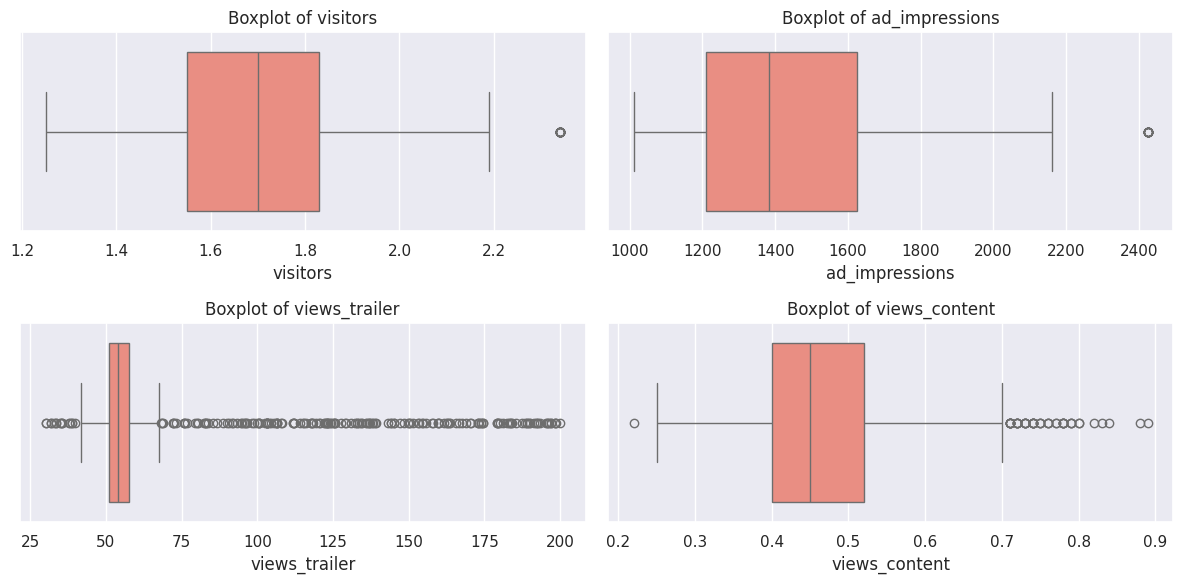

In [ ]:
numerical_cols = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))  # 2 rows x 2 columns
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

 views_trailer and views_content show the presence of some right-skewed outliers. These values are not extreme enough to significantly distort the distribution. Most views_content values lie within ±3 standard deviations. There are few mild outliers, mostly on the higher end (e.g., > 0.75 million views).
These points may reflect popular releases or marketing success.
 Since the dataset is reasonably clean and linear regression is robust to a few outliers, , we choose not to remove them.

## Exploratory Data Analysis

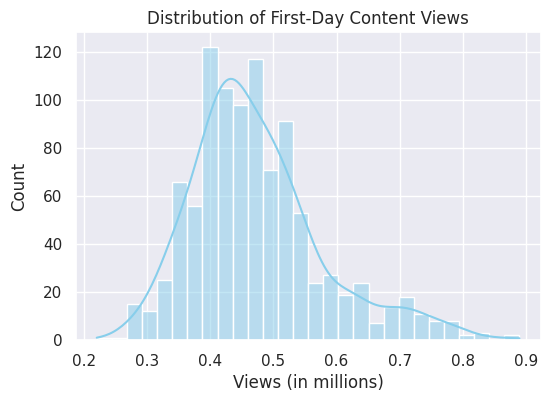

In [ ]:
# Content views distribution
plt.figure(figsize=(6,4))
sns.histplot(df['views_content'], kde=True, color='skyblue')
plt.title('Distribution of First-Day Content Views')
plt.xlabel('Views (in millions)')
plt.show()

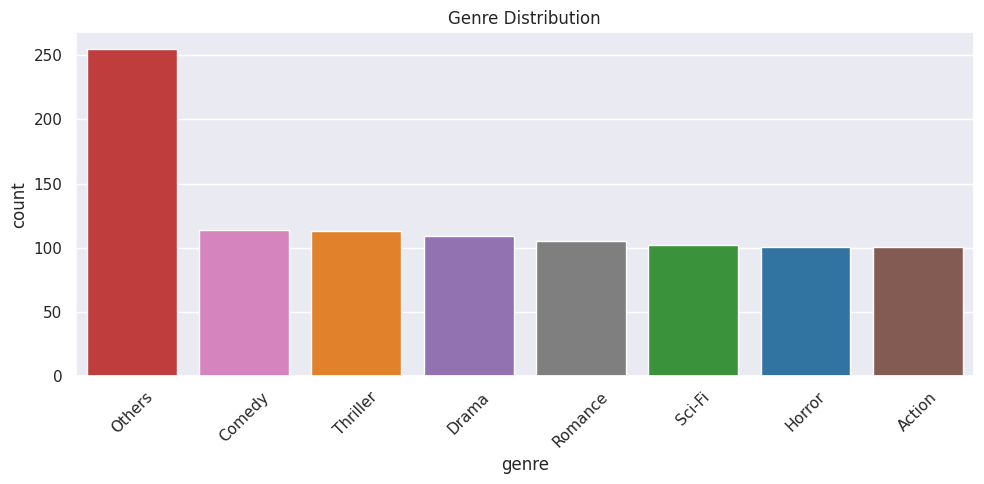

In [ ]:
# Genre distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='genre', hue='genre', legend=False, order=df['genre'].value_counts().index, palette='tab10')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-2711068682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofweek', y='views_content', palette='Set2')


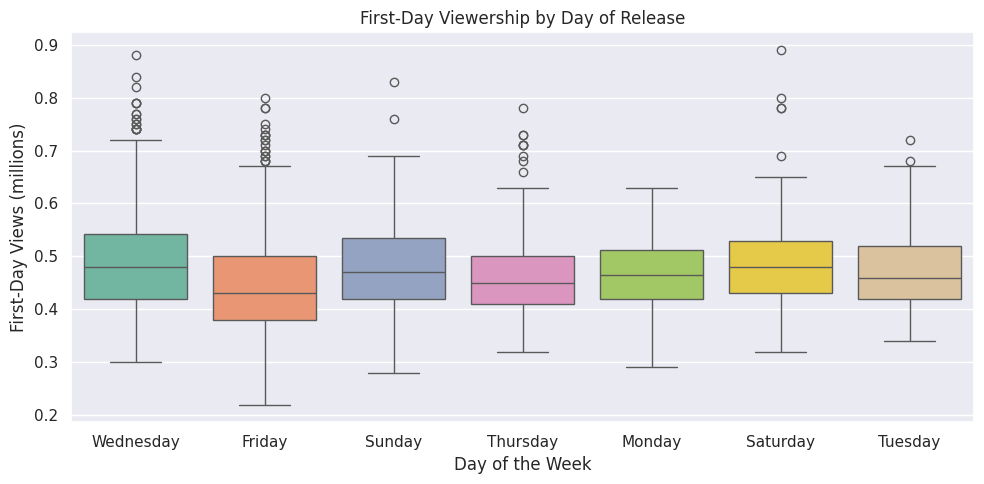

In [ ]:
# Viewership by Release date
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='dayofweek', y='views_content', palette='Set2')

plt.title('First-Day Viewership by Day of Release')
plt.xlabel('Day of the Week')
plt.ylabel('First-Day Views (millions)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-87307591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='views_content', palette='coolwarm')


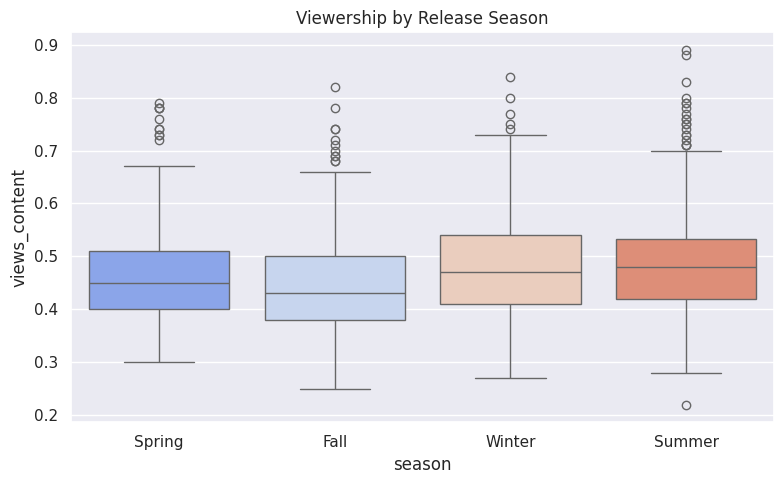

In [ ]:
# Viewership by Release Season
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='season', y='views_content', palette='coolwarm')
plt.title('Viewership by Release Season')
plt.tight_layout()
plt.show()


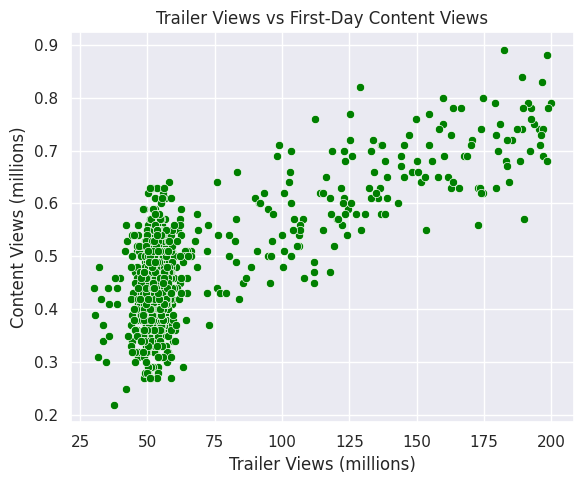

Correlation between trailer views and content views: 0.75


In [ ]:
# Scatterplot to show the correlation between Trailer Views and First-Day Content Views
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='views_trailer', y='views_content', color='green')
plt.title('Trailer Views vs First-Day Content Views')
plt.xlabel('Trailer Views (millions)')
plt.ylabel('Content Views (millions)')
plt.tight_layout()
plt.show()

# Correlation value
correlation = df[['views_trailer', 'views_content']].corr().iloc[0, 1]
print("Correlation between trailer views and content views:", round(correlation, 2))


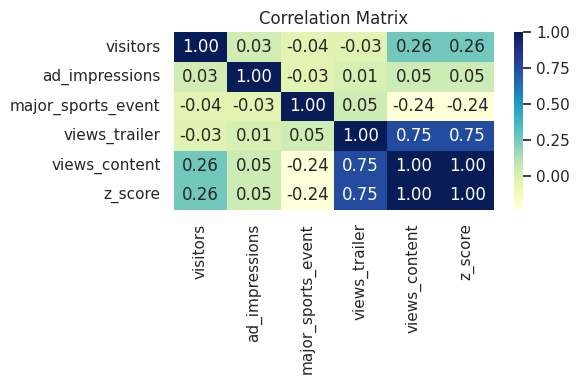

In [ ]:
# Correlation matrix using heatmap to show correlation among the numerical columns
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


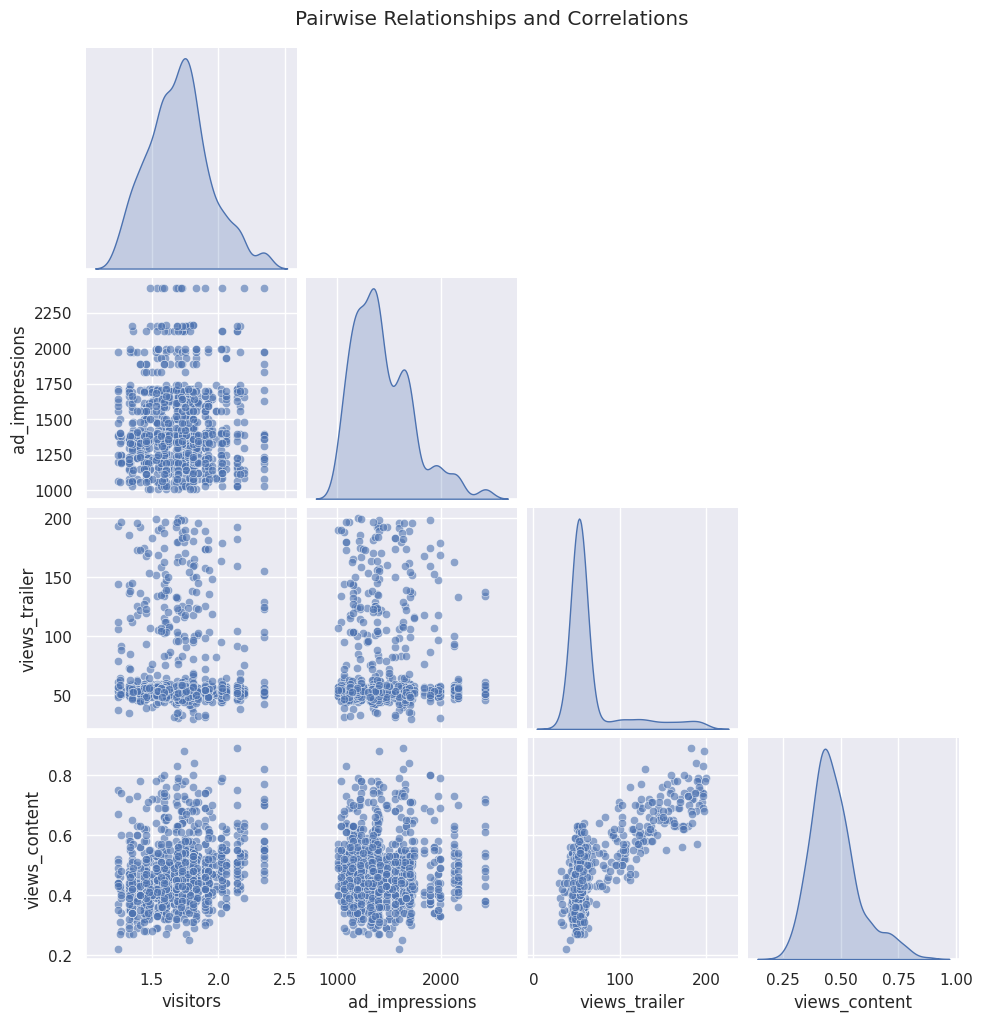

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for pairplot
num_cols = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']

# Create pairplot
sns.pairplot(df[num_cols], corner=True, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships and Correlations', y=1.02)
plt.show()

/tmp/ipython-input-24-1231677743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='major_sports_event', y='views_content', palette='Set1')


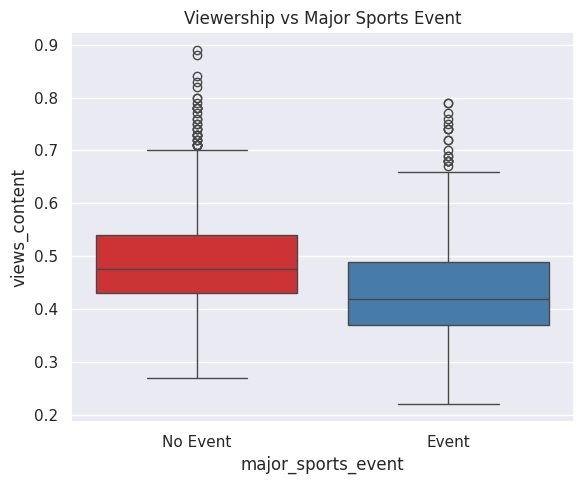

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='major_sports_event', y='views_content', palette='Set1')
plt.title('Viewership vs Major Sports Event')
plt.xticks([0, 1], ['No Event', 'Event'])
plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
# Droping z-score column
df.drop('z_score', axis=1, inplace=True)

In [ ]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['genre', 'dayofweek', 'season'], drop_first=True, dtype=float)

In [ ]:
# Defining x and y variables

# Target variable
y = df_encoded['views_content']

# Feature variables (droping only the target)
x = df_encoded.drop(columns='views_content')

x = x.astype(float)

print(x.head())
print(y.head())

   visitors  ad_impressions  major_sports_event  views_trailer  genre_Comedy  \
0      1.67         1113.81                 0.0          56.70           0.0   
1      1.46         1498.41                 1.0          52.69           0.0   
2      1.47         1079.19                 1.0          48.74           0.0   
3      1.85         1342.77                 1.0          49.81           0.0   
4      1.46         1498.41                 0.0          55.83           0.0   

   genre_Drama  genre_Horror  genre_Others  genre_Romance  genre_Sci-Fi  \
0          0.0           1.0           0.0            0.0           0.0   
1          0.0           0.0           0.0            0.0           0.0   
2          0.0           0.0           0.0            0.0           0.0   
3          0.0           0.0           0.0            0.0           1.0   
4          0.0           0.0           0.0            0.0           1.0   

   genre_Thriller  dayofweek_Monday  dayofweek_Saturday  dayofweek_S

In [ ]:
# Split training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Adding Constant to Features
x_train = sm.add_constant(x_train)

print(x_train.head())
print(y_train.head())

     const  visitors  ad_impressions  major_sports_event  views_trailer  \
541    1.0      2.14         1113.81                 0.0          50.78   
440    1.0      1.69         1079.19                 0.0         179.26   
482    1.0      1.93         1357.74                 0.0          50.74   
422    1.0      1.57         1557.20                 0.0          47.91   
778    1.0      1.54         1231.30                 0.0          58.01   

     genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  \
541           1.0          0.0           0.0           0.0            0.0   
440           0.0          0.0           0.0           0.0            0.0   
482           0.0          0.0           0.0           1.0            0.0   
422           0.0          0.0           0.0           1.0            0.0   
778           0.0          0.0           0.0           1.0            0.0   

     ...  genre_Thriller  dayofweek_Monday  dayofweek_Saturday  \
541  ...            

## Model Building

In [ ]:
# OLS model
# Fit OLS model
ols_model = sm.OLS(y_train, x_train).fit()

# Show summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     128.1
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          7.57e-215
Time:                        15:01:28   Log-Likelihood:                 1125.0
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0472    

**Model Performance**
* R-squared: 0.791


* Adj. R-squared: 0.784


* F-statistic: 128.1 with p-value ≈ 0.000


### Significant Predictors from OLS Regression

- **visitors**: Strong positive impact on content views (`p < 0.001`)
- **major_sports_event**: Negative impact; content released during major events tends to perform worse (`p < 0.001`)
- **views_trailer**: Strong positive relationship with content views (`p < 0.001`)
- **genre_Drama**: Slight positive effect (`p = 0.039`)
- **genre_Thriller**: Moderate positive effect (`p = 0.013`)
- **dayofweek_Monday**, **Saturday**, **Sunday**, **Thursday**, **Tuesday**, **Wednesday**: All show statistically significant positive effects on viewership (`p < 0.05`)
- **season_Spring**, **Summer**, **Winter**: Seasonal timing significantly affects viewership (`p < 0.001`)



## Predictions on test data

In [ ]:
# Add constant to test set as well
x_test_const = sm.add_constant(x_test)

# Predict y values
y_pred = ols_model.predict(x_test_const)


# Compare predicted vs actual values
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Show top 10 rows
print(comparison.head(10))


     Actual  Predicted
521    0.42   0.395047
737    0.59   0.550833
740    0.32   0.414984
660    0.69   0.722816
411    0.28   0.325739
678    0.51   0.475848
626    0.35   0.419176
513    0.43   0.462366
859    0.45   0.453925
136    0.45   0.500262


In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-squared Score
r2 = r2_score(y_test, y_pred)

# Print all metrics
print(f"Model Performance on Test Set:\n")
print(f"R-squared       : {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root MSE (RMSE) : {rmse:.3f}")


Model Performance on Test Set:

R-squared       : 0.764
Mean Absolute Error (MAE): 0.041
Mean Squared Error (MSE): 0.003
Root MSE (RMSE) : 0.051


## Assumptions of linear regression model

**Assumptions for Linear Regression**

We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### Test for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Droping the target variable
predictors = df_encoded.drop(columns='views_content')

# Adding constant
predictors = sm.add_constant(predictors)

# Ensuring all columns are numeric
predictors = predictors.astype(float)

# Defining VIF function
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

# VIF check
vif_df = checking_vif(predictors)
print(vif_df.sort_values(by="VIF", ascending=False))


                feature         VIF
0                 const  102.778999
8          genre_Others    2.721951
11       genre_Thriller    1.932870
5          genre_Comedy    1.907395
6           genre_Drama    1.896472
9         genre_Romance    1.871581
10         genre_Sci-Fi    1.859077
7          genre_Horror    1.856066
19        season_Summer    1.564355
20        season_Winter    1.547323
18        season_Spring    1.513794
17  dayofweek_Wednesday    1.286838
15   dayofweek_Thursday    1.152524
13   dayofweek_Saturday    1.140913
14     dayofweek_Sunday    1.122056
16    dayofweek_Tuesday    1.052625
12     dayofweek_Monday    1.050543
3    major_sports_event    1.040329
4         views_trailer    1.018468
1              visitors    1.016457
2        ad_impressions    1.016221


**Multicollinearity Check using Variance Inflation Factor (VIF)**

* All VIF values are below 5, indicating there is no significant multicollinearity among the predictors.
* This confirms the assumption of 'No Multicollinearity' holds true for our linear regression model.

 Note: The 'const' term typically has a high VIF and can be safely ignored in interpretation.


### Test for Linearity and Independence

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = ols_model.fittedvalues  # predicted values
df_pred["Residuals"] = ols_model.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
541,0.44,0.483425,-0.043425
440,0.73,0.721290,0.008710
482,0.35,0.437467,-0.087467
422,0.41,0.432691,-0.022691
778,0.48,0.478821,0.001179


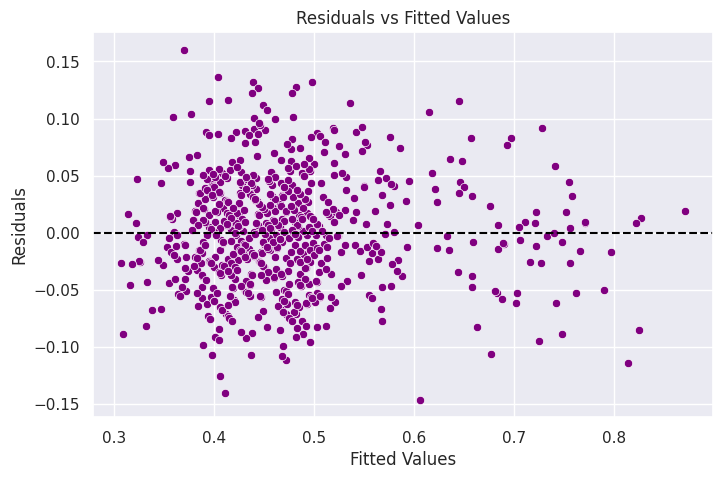

In [ ]:
# 📈 Residuals vs Fitted Plot to check Linearity and Independence
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pred["Fitted Values"], y=df_pred["Residuals"], color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


 Residuals vs Fitted Values Plot




- The residuals are fairly randomly distributed around the horizontal line (y=0).
- There is no funnel shape or curvature.

Therefore, both **linearity** and **independence of errors** assumptions appear to hold true for this regression model.


### Test for Normality

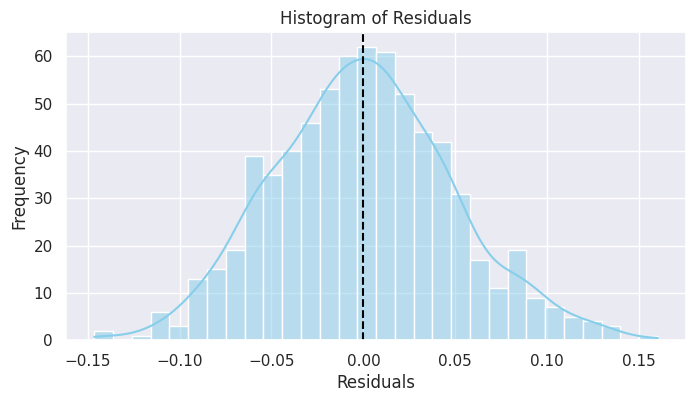

In [ ]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(df_pred["Residuals"], kde=True, color='skyblue', bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, linestyle='--', color='black')
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

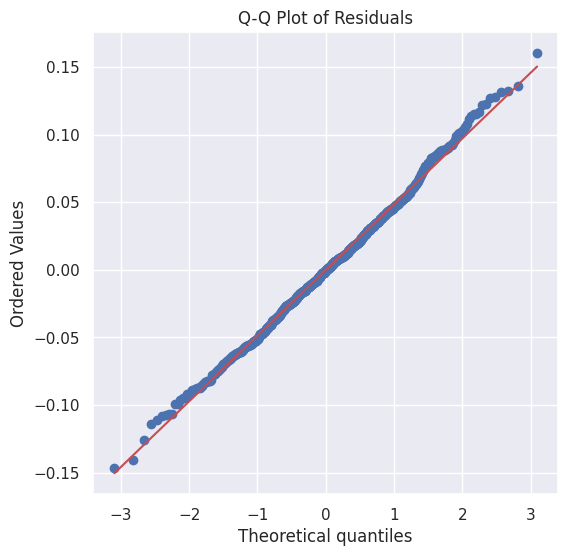

In [ ]:
# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(df_pred["Residuals"], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

* Histogram of Residuals:
The histogram shows a roughly symmetric bell-shaped distribution centered around zero, indicating approximate normality.

* Q-Q Plot:
Most of the residuals lie close to the reference line, suggesting that the residuals follow a normal distribution with only slight deviation at the tails.

Therefore, the residuals appear to be approximately normally distributed, and thus the normality assumption is satisfied.

### Test for Homoscedasticity

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Assumes:
# - df_pred["Residuals"] contains residuals from the OLS model
# - x_train is your training features DataFrame (without target)

# Goldfeld-Quandt Test
# Null Hypothesis: Homoscedasticity (equal variance of residuals)
# Alternate Hypothesis: Heteroscedasticity

# Prepare input
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)

# Show results
results = lzip(name, test)
print("Goldfeld-Quandt Test Results:")
for item in results:
    print(f"{item[0]}: {item[1]:.4f}")


Goldfeld-Quandt Test Results:
F statistic: 1.0068
p-value: 0.4755


Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no strong evidence of heteroscedasticity. Thus, the assumption of constant variance of residuals appears to hold.